# Mercedes Benz Greener Manufacturing 

In [2]:
#Importing necessary modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

from xgboost import XGBRegressor
from sklearn.decomposition import PCA

In [3]:
#Reading the train and test dataset

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.shape, test_df.shape)
train_df

(4209, 378) (4209, 377)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


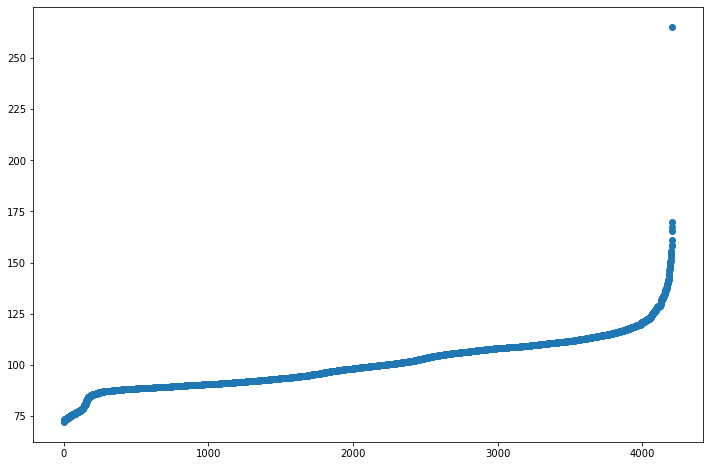

In [12]:
#Check for y variable range

plt.figure(figsize=(12,8))
plt.scatter(range(train_df.ID.nunique()), np.sort(train_df.y))
plt.show()

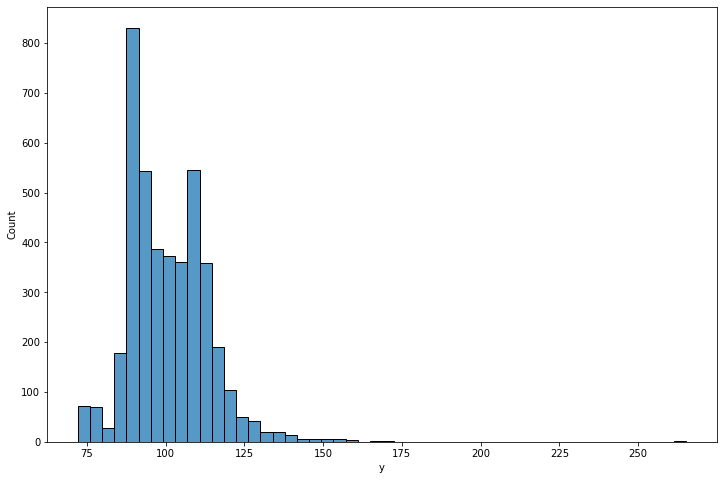

In [13]:
#Check for frequency of y variable

plt.figure(figsize=(12,8))
sns.histplot(train_df.y, bins=50, kde=False)
plt.show()

In [14]:
# Checking datatypes of the independent variables

train_dtypes = train_df.dtypes.reset_index()
train_dtypes.columns = ('Count','Column Type')
train_dtypes.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,int32,8
1,int64,369
2,float64,1


In [15]:
#Datatypes

train_dtypes.loc[:10,:]

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,int32
3,X1,int32
4,X2,int32
5,X3,int32
6,X4,int32
7,X5,int32
8,X6,int32
9,X8,int32


In [16]:
#Check for missing elements

train_df.isnull().any().unique()

array([False])

In [17]:
mv = train_df.isnull().sum().reset_index()
mv.columns = ['Column Name', 'Missing Count']
mv = mv[mv['Missing Count']>0]
mv

,Column Name,Missing Count


In [20]:
# Checking for unique values in columns

unique_values_dictionary = {}

for c in train_df.columns[10:]:
    un_v = str(np.sort(train_df[c].unique()).tolist())
    tlist = unique_values_dictionary.get(un_v,[])
    tlist.append(c)
    unique_values_dictionary[un_v] = tlist[:]

for uv, cc in unique_values_dictionary.items():
    print("Columns containing unique values : ",uv)
    print(cc)
    print('--------------------------------------------------------')

Columns containing unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X

In [22]:
train_df.columns[10:]

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

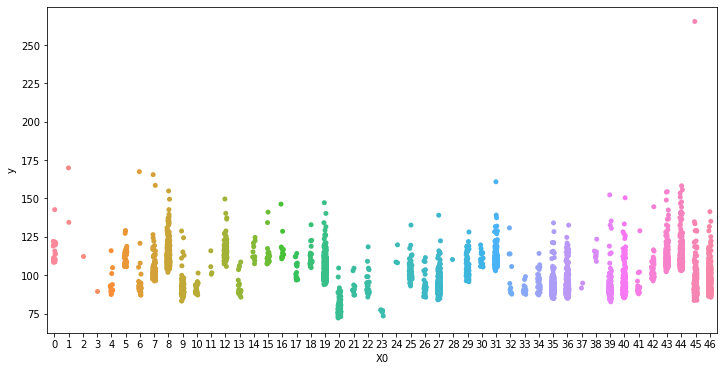

In [23]:
#Checking unique value distribution for object type varibles

variable = 'X0'
plt.figure(figsize=(12,6))
sns.stripplot(x=variable, y='y', data=train_df, order=np.sort(train_df[variable].unique()))
plt.show()

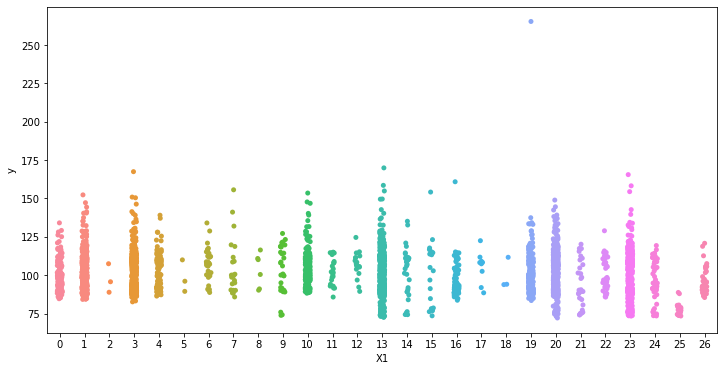

In [24]:
variable = 'X1'
plt.figure(figsize=(12,6))
sns.stripplot(x=variable, y='y', data=train_df, order=np.sort(train_df[variable].unique()))
plt.show()

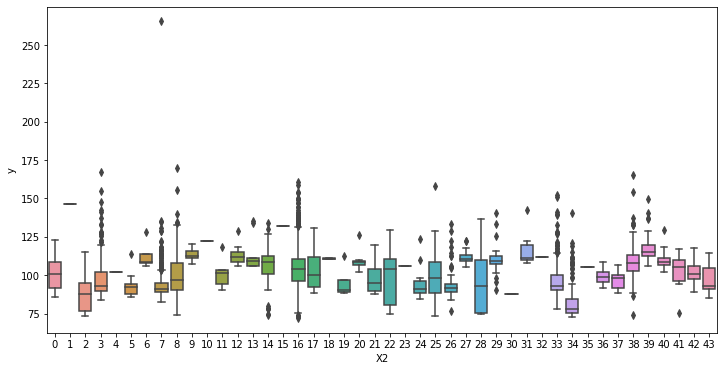

In [25]:
variable = 'X2'
plt.figure(figsize=(12,6))
sns.boxplot(x=variable, y='y', data=train_df, order=np.sort(train_df[variable].unique()))
plt.show()

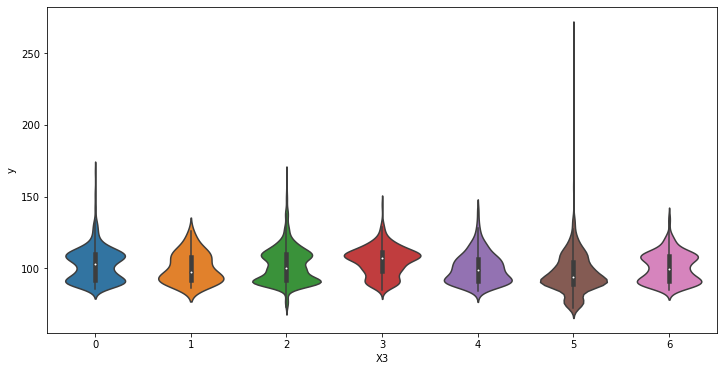

In [26]:
variable = 'X3'
plt.figure(figsize=(12,6))
sns.violinplot(x=variable, y='y', data=train_df, order=np.sort(train_df[variable].unique()))
plt.show()

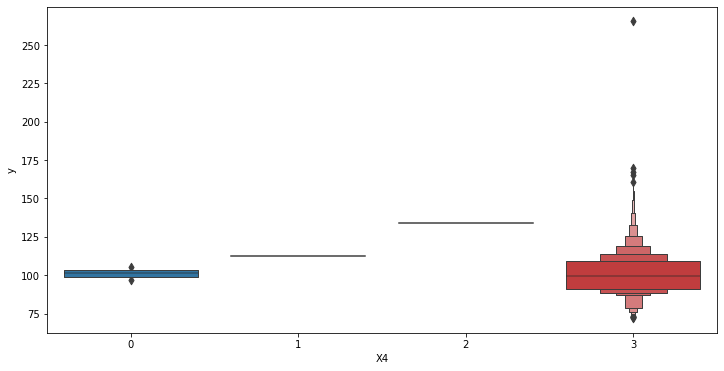

In [27]:
variable = 'X4'
plt.figure(figsize=(12,6))
sns.boxenplot(x=variable, y='y', data=train_df, order=np.sort(train_df[variable].unique()))
plt.show()

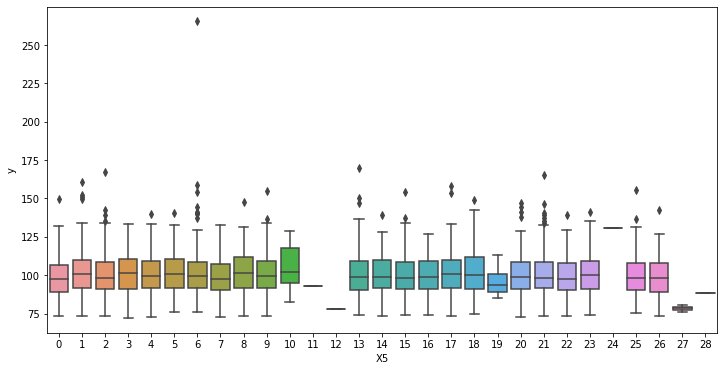

In [28]:
variable = 'X5'
plt.figure(figsize=(12,6))
sns.boxplot(x=variable, y='y', data=train_df, order=np.sort(train_df[variable].unique()))
plt.show()

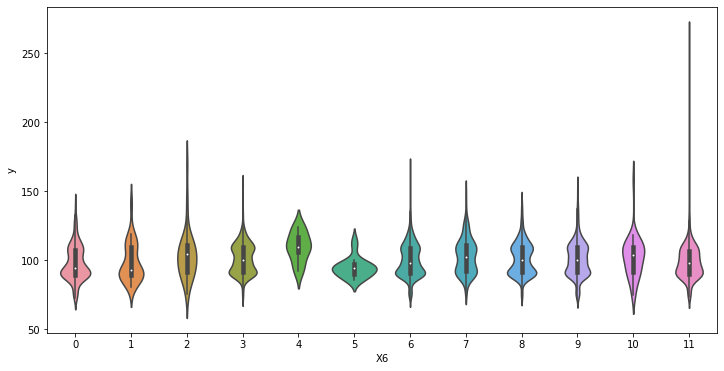

In [29]:
variable = 'X6'
plt.figure(figsize=(12,6))
sns.violinplot(x=variable, y='y', data=train_df, order=np.sort(train_df[variable].unique()))
plt.show()

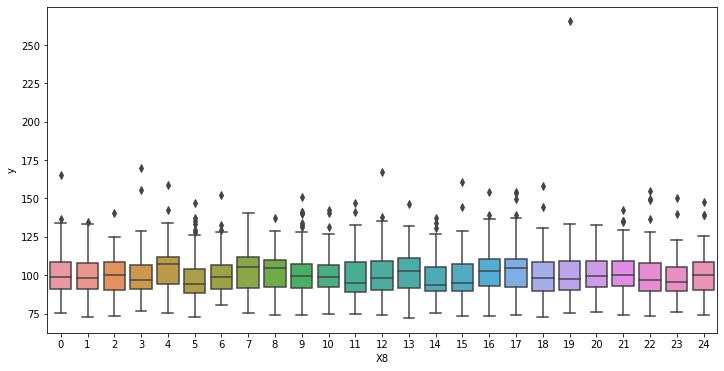

In [30]:
variable = 'X8'
plt.figure(figsize=(12,6))
sns.boxplot(x=variable, y='y', data=train_df, order=np.sort(train_df[variable].unique()))
plt.show()

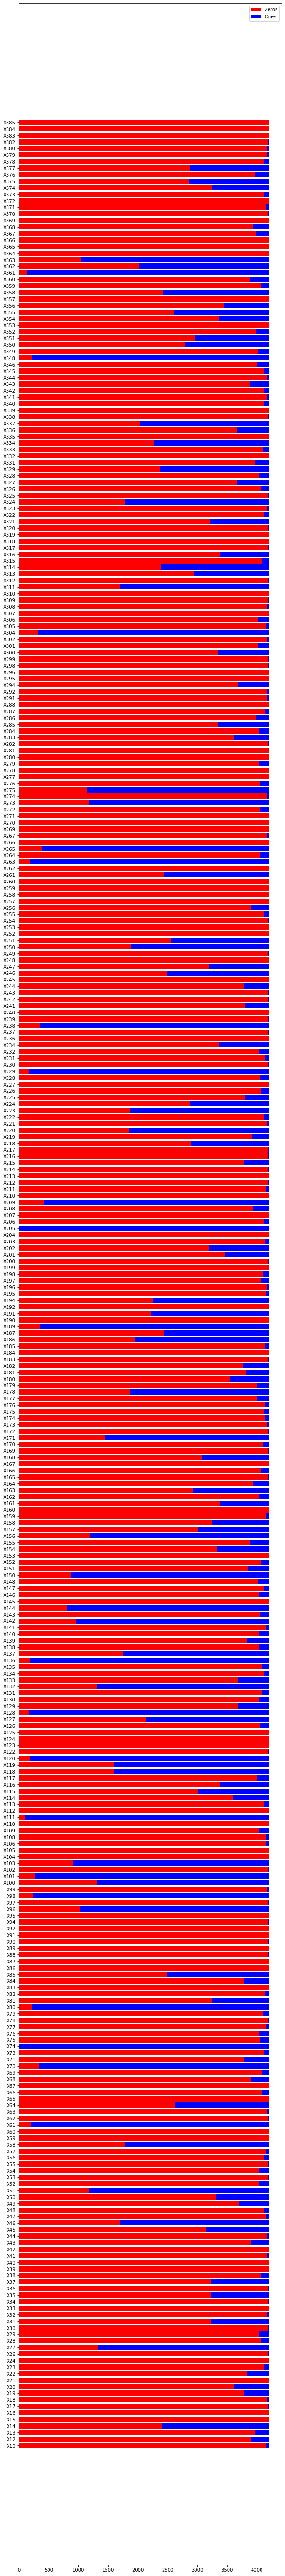

In [31]:
#Checking unique distribution of binary varibles

Zeros = []
Ones = []
ListOfColumns = unique_values_dictionary['[0, 1]']
N = np.arange(len(ListOfColumns))

for cc in ListOfColumns:
    Zeros.append((train_df[cc]==0).sum())
    Ones.append((train_df[cc]==1).sum())

plt.figure(figsize=(10,100))
plot1 = plt.barh(N, Zeros, color='r')
plot2 = plt.barh(N, Ones, left=Zeros, color='b')
plt.legend((plot1[0],plot2[0]),('Zeros','Ones'))
plt.yticks(N, ListOfColumns)
plt.show()

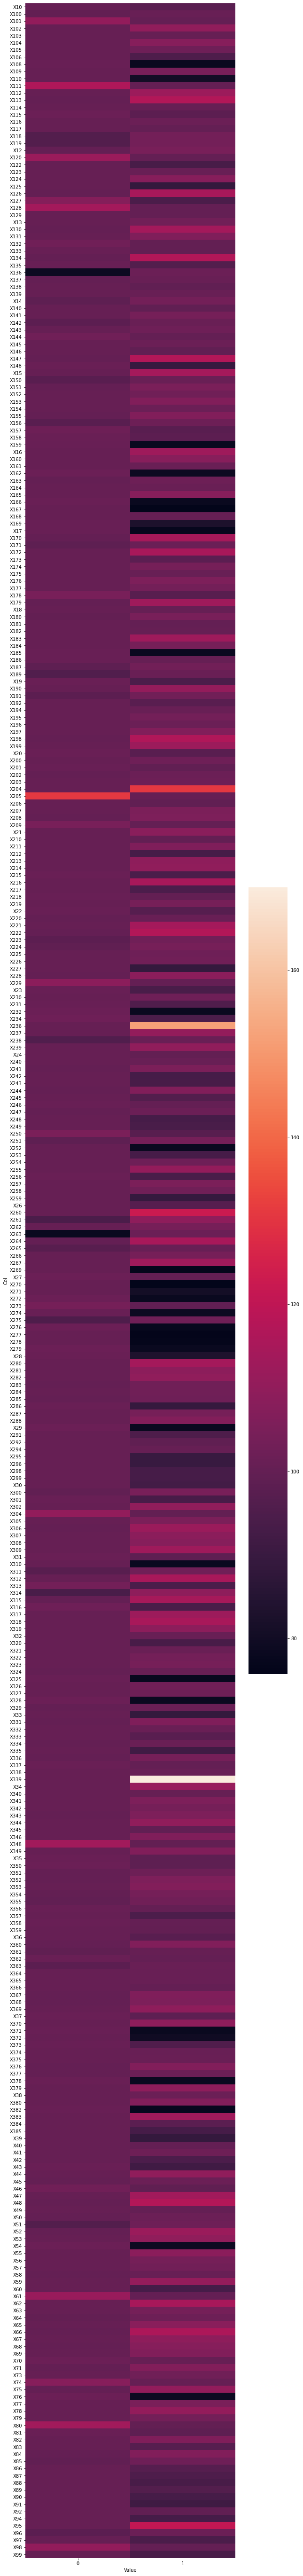

In [32]:
#Checking the mean y value across the binary variables

Zeros_m = []
Ones_m = []
ListOfColumns = unique_values_dictionary['[0, 1]']

for c in ListOfColumns:
    Zeros_m.append(train_df.loc[train_df[c]==0].y.mean())
    Ones_m.append(train_df.loc[train_df[c]==1].y.mean())

ym = pd.DataFrame({"Col":ListOfColumns+ListOfColumns,"Value":[0]*len(ListOfColumns)+[1]*len(ListOfColumns),"ym":Zeros_m+Ones_m})
ym = ym.pivot("Col",'Value',"ym")

plt.figure(figsize=(10,100))
sns.heatmap(ym)
plt.show()

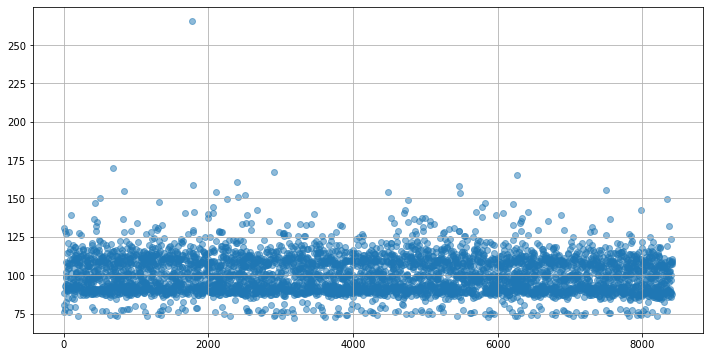

In [33]:
#Relationship between ID and y

plt.figure(figsize=(12,6))
plt.scatter(train_df.ID, train_df.y, alpha=0.5)
plt.grid()
plt.show()

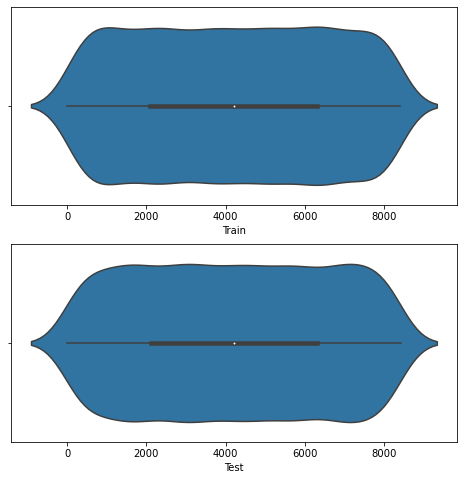

In [69]:
#Checking ID distribtuion across training and test dataset

IDS = pd.concat([train_df.ID, test_df.ID], axis=1)
IDS.columns = ['Train','Test']

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.violinplot(x=IDS.Train)
plt.subplot(2,1,2)
sns.violinplot(x=IDS.Test)
plt.show()

In [35]:
#Applying Label Encoder

for i in list(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']):
    train_df[i] = LabelEncoder().fit_transform(train_df[i])

In [36]:
#Splititng the Dataset

x = train_df.drop(['ID','y'], axis=1)
y = train_df.y

x1,x2,y1,y2 = train_test_split(x,y,test_size=0.2, random_state=0)

print(x.shape, y.shape, x1.shape, y1.shape, x2.shape, y2.shape)

(4209, 376) (4209,) (3367, 376) (3367,) (842, 376) (842,)


In [39]:
#Dimensionality Reduction

Ntrainx = PCA(n_components=2).fit_transform(x)

In [45]:
# Applying XGBoost Regressor

XGB = XGBRegressor().fit(x1,y1).predict(x2)
print("The Mean Squared Error for XGB is",np.sqrt(mean_squared_error(XGB, y2)))

The Mean Squared Error for XGB is 10.401439867536888


In [52]:
#Predicting y value for test dataset

for i in test_df.columns[1:9]:
    test_df[i] = LabelEncoder().fit_transform(test_df[i])
    
xx = test_df.drop('ID', axis=1)

XGB = XGBRegressor().fit(x,y).predict(xx)
print("The predicted y values for the test dataset are :",XGB)

The predicted y values for the test dataset are : [ 99.44908  114.26388  100.843636 ...  91.6147   108.98758   94.22524 ]


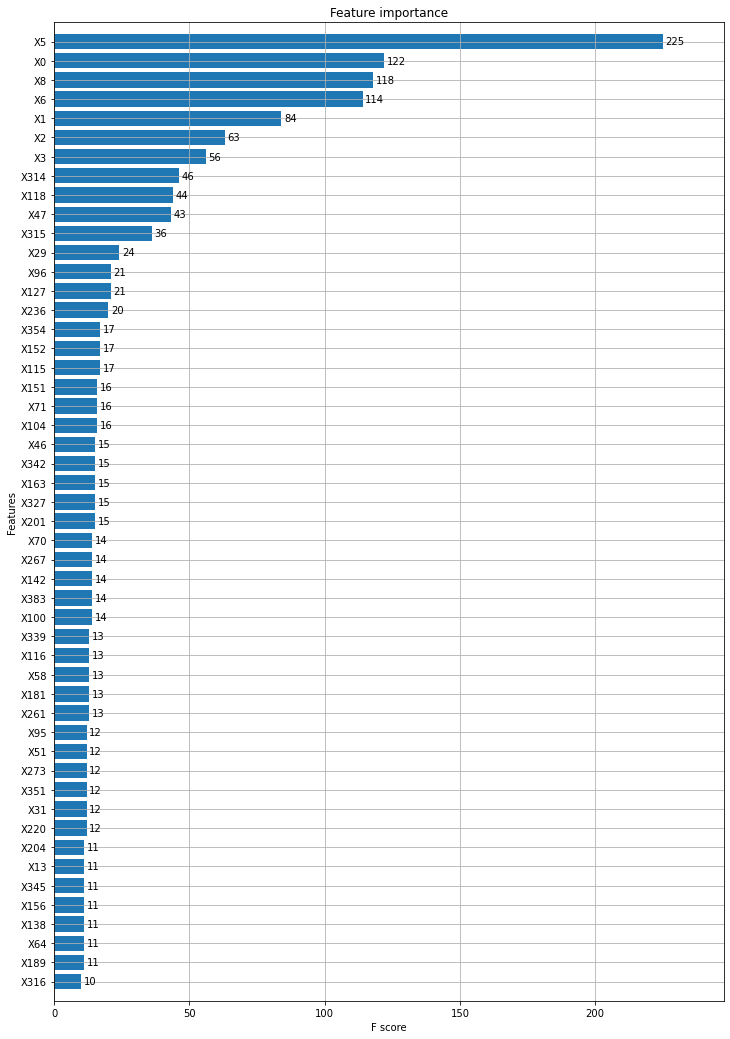

In [67]:
# Bonus - Check for importance of variables that affect y value

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:squarederror',
    #'silent': 1
}
dtrain = xgboost.DMatrix(x, y, feature_names=x.columns.values)
model = xgboost.train(dict(xgb_params), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

fig, ax = plt.subplots(figsize=(12,18))
xgboost.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [ ]:
#<<<-----------------------------------THE END------------------------------------------->>>